In [ ]:
import pandas as pd
import numpy as np
from google.colab import files
from sklearn.preprocessing import MinMaxScaler
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error
from sklearn.svm import SVR
from sklearn.metrics import accuracy_score
from sklearn.ensemble import RandomForestRegressor
from sklearn.linear_model import Lasso
from sklearn.linear_model import Ridge
import matplotlib.pyplot as plt
from sklearn.preprocessing import LabelEncoder
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import GradientBoostingRegressor
import networkx as nx
import seaborn as sns

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
original_dataset_path = '/content/drive/MyDrive/Thesis/Dataset/gene_disease_associations.csv'

# Read the original Excel dataset
df = pd.read_csv(original_dataset_path)

# Filter the dataset based on the condition (score > 0.2)
filtered_df = df[df['score'] > 0.25]

# Convert DataFrame to CSV format
filtered_csv = filtered_df.to_csv(index=False)

# Specify the filename for the filtered dataset
filtered_dataset_filename = 'filtered_dataset.csv'

# Save the CSV file locally in the Google Colab environment
with open(filtered_dataset_filename, 'w') as file:
    file.write(filtered_csv)

# Download the CSV file from Google Colab
files.download(filtered_dataset_filename)

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

In [ ]:
# data_path = '/content/drive/My Drive/Thesis/Dataset/filtered_dataset.csv'
data_path = '/content/drive/My Drive/pro/filtered_dataset.csv'
df = pd.read_csv(data_path)
df.head()

# Get unique values of the "geneSymbol" column
unique_genes = df['geneId'].nunique()

# Get unique values of the "DiseaseName" column
unique_diseases = df['diseaseId'].nunique()

print("Total data:",df.shape[0])

# Print the unique gene symbols
print("Unique Gene Quantity:")
print(unique_genes)

# Print the unique disease names
print("\nUnique Disease Quantity:")
print(unique_diseases)

Total data: 25682
Unique Gene Quantity:
7754

Unique Disease Quantity:
6170


**Data combination analysis**

In [ ]:
df = pd.read_csv(data_path)

# Split the "associationType" column by commas and create a new DataFrame
association_df = df['associationType'].str.split(', ', expand=True)

# Find unique combinations by converting each row to a frozenset and then finding unique rows
unique_combinations = association_df.apply(frozenset, axis=1).unique()

# Convert the frozensets back to lists for better visualization
unique_combinations = [list(combination) for combination in unique_combinations]

In [ ]:
# Create a dictionary to store the count of each unique combination
combination_count = {}

# Count the occurrences of each unique combination in the DataFrame
for combination in unique_combinations:
    combination_str_list = [attr for attr in combination if attr]  # Remove None values
    combination_str = ', '.join(combination_str_list)
    count = (association_df.apply(lambda row: set(combination).issubset(row), axis=1)).sum()
    combination_count[combination_str] = count

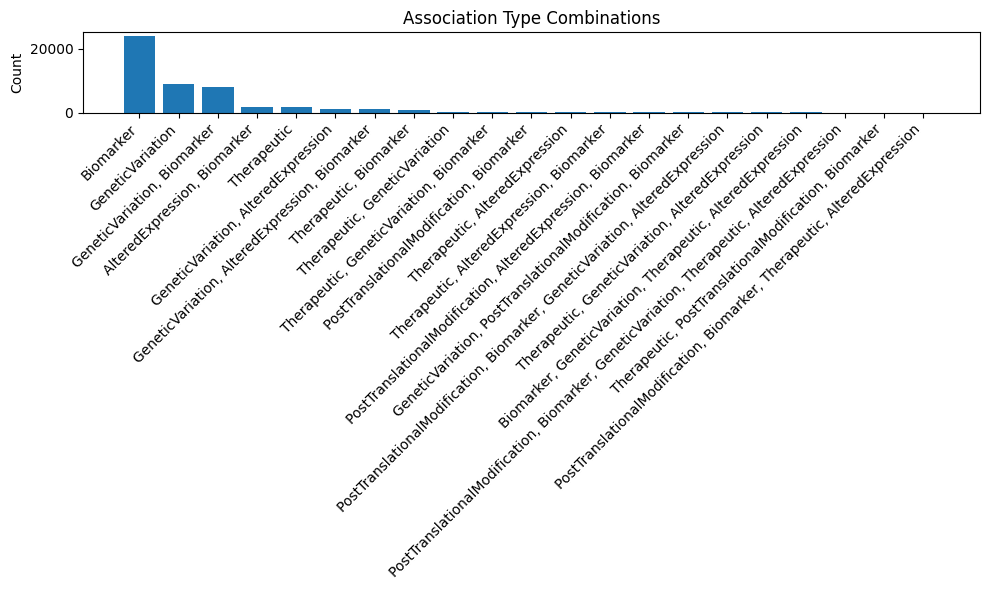

In [ ]:
# Convert the combination_count dictionary to a DataFrame for easier plotting
combination_count_df = pd.DataFrame(list(combination_count.items()), columns=['Combination', 'Count'])

# Sort the DataFrame by count in descending order
combination_count_df = combination_count_df.sort_values(by='Count', ascending=False)

# Create the bar chart
plt.figure(figsize=(10, 6))
plt.bar(combination_count_df['Combination'], combination_count_df['Count'])
plt.xticks(rotation=45, ha='right')
#plt.xlabel('Attribute Combination')
plt.ylabel('Count')
plt.title('Association Type Combinations')
plt.tight_layout()
plt.show()

# **Level Encodeing to Gene Symbol**

In [ ]:
df = pd.read_csv(data_path)

# Create a LabelEncoder object
# Create a LabelEncoder object
label_encoder = LabelEncoder()

# Fit the encoder on the 'geneSymbol' column and transform the data
df['geneSymbol_encoded'] = label_encoder.fit_transform(df['geneSymbol'])

# Display the encoded DataFrame
print(df)

       geneId geneSymbol                                           geneName  \
0         540      ATP7B        ATPase, Cu++ transporting, beta polypeptide   
1        4160       MC4R                            melanocortin 4 receptor   
2        3667       IRS1                       insulin receptor substrate 1   
3        4204      MECP2                       methyl CpG binding protein 2   
4        1080       CFTR  cystic fibrosis transmembrane conductance regu...   
...       ...        ...                                                ...   
25677    3856       KRT8                                 keratin 8, type II   
25678    3909      LAMA3                                   laminin, alpha 3   
25679    5830       PEX5                    peroxisomal biogenesis factor 5   
25680     585       BBS4                            Bardet-Biedl syndrome 4   
25681   57502     NLGN4X                             neuroligin 4, X-linked   

       AlteredExpression  Biomarker  GeneticVariati

# **Normalize geneId,diseaseId, numOfPubmed and geneSymbol_encoded**

In [ ]:
numerical_features = ['NumberOfPubmeds', 'geneId', 'diseaseId','geneSymbol_encoded']

# Create an instance of the MinMaxScaler
scaler = MinMaxScaler()

# Fit the scaler to the numerical features and transform them
X_scaled = scaler.fit_transform(df[numerical_features])


In [ ]:
#Replace the old values with new normalized values

# Create a new DataFrame with the scaled values
X_scaled_df = pd.DataFrame(X_scaled, columns=numerical_features)

# Replace the original values with the normalized values
df[numerical_features] = X_scaled_df

In [ ]:
print(df[5:-2])

         geneId geneSymbol                                           geneName  \
5      0.000055       PRNP                                      prion protein   
6      0.000023       FMR1                     fragile X mental retardation 1   
7      0.000038        KIT  v-kit Hardy-Zuckerman 4 feline sarcoma viral o...   
8      0.000041       MEFV                                Mediterranean fever   
9      0.000062      SCN5A  sodium channel, voltage gated, type V alpha su...   
...         ...        ...                                                ...   
25675  0.000045       TRNW                                               tRNA   
25676  0.000019      ECHS1  enoyl CoA hydratase, short chain, 1, mitochond...   
25677  0.000038       KRT8                                 keratin 8, type II   
25678  0.000038      LAMA3                                   laminin, alpha 3   
25679  0.000057       PEX5                    peroxisomal biogenesis factor 5   

       AlteredExpression  B

# **Shuffle the dataset**

In [ ]:
shuffled_data = df.sample(frac=1, random_state=42)

# Reset the index of the shuffled dataset
shuffled_data.reset_index(drop=True, inplace=True)

# Display the shuffled dataset
print(shuffled_data.head())

     geneId geneSymbol                                           geneName  \
0  0.000050   SERPINB2  serpin peptidase inhibitor, clade B (ovalbumin...   
1  0.000047     NFKBIA  nuclear factor of kappa light polypeptide gene...   
2  0.000040     MARCKS  myristoylated alanine-rich protein kinase C su...   
3  0.000568        PRX                                           periaxin   
4  0.000056      PSMB8  proteasome (prosome, macropain) subunit, beta ...   

   AlteredExpression  Biomarker  GeneticVariation  \
0                0.0        1.0               0.0   
1                0.0        1.0               1.0   
2                0.0        1.0               0.0   
3                0.0        1.0               0.0   
4                0.0        1.0               1.0   

   PostTranslationalModification  Therapeutic  diseaseId  \
0                            0.0          0.0   0.007974   
1                            0.0          1.0   0.587568   
2                            0.0      

In [ ]:
shuffled_data.isnull().sum()  # Check for missing values in each column

# Drop rows with missing values
shuffled_data.dropna(inplace=True)

# Fill missing values with a specific value
shuffled_data.fillna(0, inplace=True)

# **Performance Evaluation**

In [ ]:
class eva_per:

  def rmse(y_true, y_pred):
    """Calculates the Root Mean Squared Error (RMSE)"""
    mse = np.mean((y_true - y_pred) ** 2)
    rmse = np.sqrt(mse)
    return rmse

  def mae(y_true, y_pred):
    """Calculates the Mean Absolute Error (MAE)"""
    mae = np.mean(np.abs(y_true - y_pred))
    return mae

  def r_squared(y_true, y_pred):
    """Calculates the R-squared (R²) value"""
    ss_res = np.sum((y_true - y_pred) ** 2)
    ss_total = np.sum((y_true - np.mean(y_true)) ** 2)
    r2 = 1 - (ss_res / ss_total)
    return r2

  def mean_sqaure(y_true, y_pred):
    return mean_squared_error(y_test, y_pred)

  def mape(y_true, y_pred):
    """Calculates the Mean Absolute Percentage Error (MAPE)"""
    ape = np.abs((y_true - y_pred) / y_true)
    mape = np.mean(ape) * 100
    return mape

# **Data Splitting**

In [ ]:
X = shuffled_data[['geneId', 'AlteredExpression', 'Biomarker', 'GeneticVariation', 'PostTranslationalModification',
          'Therapeutic', 'diseaseId', 'NumberOfPubmeds', 'geneSymbol_encoded']]
y = shuffled_data['score']

#  (70% training, 30% test)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)



# **Linear Regression**

In [ ]:
model = LinearRegression()
model.fit(X_train, y_train)

y_pred = model.predict(X_test)

# Calculate the mean squared error (MSE)
mse = eva_per.mean_sqaure(y_test, y_pred)

# Print the MSE
print("Mean Squared Error:", mse)


#calculate the rmse score
rmse_score =eva_per.rmse(y_test, y_pred)
print("RMSE:", rmse_score)

mae_score = eva_per.mae(y_test, y_pred)
print("MAE:", mae_score)

r2_score = eva_per.r_squared(y_test, y_pred)
print("R-squared:", r2_score)


mape_score = eva_per.mape(y_test, y_pred)
print("MAPE:", mape_score)

Mean Squared Error: 0.008899611590084193
RMSE: 0.09433775272966911
MAE: 0.05641815813211512
R-squared: 0.3735786927113979
MAPE: 19.38232418865037


# **Decision Tree Regressior**

In [ ]:
model = DecisionTreeRegressor(random_state=42)
model.fit(X_train, y_train)

# Step 4: Make predictions
y_pred = model.predict(X_test)


# Calculate the mean squared error (MSE)
mse = eva_per.mean_sqaure(y_test, y_pred)

# Print the MSE
print("Mean Squared Error:", mse)


#calculate the rmse score
rmse_score =eva_per.rmse(y_test, y_pred)
print("RMSE:", rmse_score)

mae_score = eva_per.mae(y_test, y_pred)
print("MAE:", mae_score)

r2_score = eva_per.r_squared(y_test, y_pred)
print("R-squared:", r2_score)


mape_score = eva_per.mape(y_test, y_pred)
print("MAPE:", mape_score)

Mean Squared Error: 0.008863313672416507
RMSE: 0.09414517338884935
MAE: 0.035393871847771194
R-squared: 0.37613361196906303
MAPE: 10.557076489438444


# **Random Forest Regressor**

In [ ]:
model = RandomForestRegressor()

# Train the model on the training data
model.fit(X_train, y_train)

# Make predictions on the testing data
y_pred = model.predict(X_test)

# Make predictions on the testing data
y_pred = model.predict(X_test)

# Calculate the mean squared error (MSE)
mse = eva_per.mean_sqaure(y_test, y_pred)

# Print the MSE
print("Mean Squared Error:", mse)


#calculate the rmse score
rmse_score =eva_per.rmse(y_test, y_pred)
print("RMSE:", rmse_score)

mae_score = eva_per.mae(y_test, y_pred)
print("MAE:", mae_score)

r2_score = eva_per.r_squared(y_test, y_pred)
print("R-squared:", r2_score)


mape_score = eva_per.mape(y_test, y_pred)
print("MAPE:", mape_score)

Mean Squared Error: 0.005036116607285583
RMSE: 0.07096560157770512
MAE: 0.03120328938596871
R-squared: 0.6455204008780984
MAPE: 9.317290341557568


# **Gradient Boosting Regressor**

In [ ]:
model = GradientBoostingRegressor(random_state=42)
model.fit(X_train, y_train)

# Step 4: Make predictions
y_pred = model.predict(X_test)

# Calculate the mean squared error (MSE)
mse = eva_per.mean_sqaure(y_test, y_pred)

# Print the MSE
print("Mean Squared Error:", mse)


#calculate the rmse score
rmse_score =eva_per.rmse(y_test, y_pred)
print("RMSE:", rmse_score)

mae_score = eva_per.mae(y_test, y_pred)
print("MAE:", mae_score)

r2_score = eva_per.r_squared(y_test, y_pred)
print("R-squared:", r2_score)


mape_score = eva_per.mape(y_test, y_pred)
print("MAPE:", mape_score)


Mean Squared Error: 0.005490354819490005
RMSE: 0.07409692854288905
MAE: 0.03608420540466598
R-squared: 0.6135477139996546
MAPE: 11.108016322199008


# **SVR**

In [ ]:
model = SVR()

# Train the model on the training data
model.fit(X_train, y_train)

# Make predictions on the testing data
y_pred = model.predict(X_test)

# Calculate the mean squared error (MSE)
mse = eva_per.mean_sqaure(y_test, y_pred)

# Print the MSE
print("Mean Squared Error:", mse)


#calculate the rmse score
rmse_score =eva_per.rmse(y_test, y_pred)
print("RMSE:", rmse_score)

mae_score = eva_per.mae(y_test, y_pred)
print("MAE:", mae_score)

r2_score = eva_per.r_squared(y_test, y_pred)
print("R-squared:", r2_score)


mape_score = eva_per.mape(y_test, y_pred)
print("MAPE:", mape_score)


Mean Squared Error: 0.010681522730449543
RMSE: 0.10335145248350186
MAE: 0.08856400882527807
R-squared: 0.248154443043753
MAPE: 35.76567232471265


**CatBoost**

In [ ]:
from catboost import CatBoostRegressor
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score

# Create a CatBoost regression model
model = CatBoostRegressor(iterations=500, learning_rate=0.1, depth=6)

# Train the model on the training data
model.fit(X_train, y_train)

# Make predictions on the testing data
y_pred = model.predict(X_test)

# Calculate the mean squared error (MSE)
mse = mean_squared_error(y_test, y_pred)

# Print the MSE
print("Mean Squared Error:", mse)

# Calculate the root mean squared error (RMSE)
rmse_score = np.sqrt(mse)
print("RMSE:", rmse_score)

# Calculate the mean absolute error (MAE)
mae_score = mean_absolute_error(y_test, y_pred)
print("MAE:", mae_score)

# Calculate the R-squared (Coefficient of Determination)
r2_score = r2_score(y_test, y_pred)
print("R-squared:", r2_score)

# Calculate the Mean Absolute Percentage Error (MAPE) if you have defined it in "eva_per" module
mape_score = eva_per.mape(y_test, y_pred)
print("MAPE:", mape_score)


0:	learn: 0.1141246	total: 51.5ms	remaining: 25.7s
1:	learn: 0.1088126	total: 56.2ms	remaining: 14s
2:	learn: 0.1040042	total: 59.9ms	remaining: 9.93s
3:	learn: 0.1003678	total: 63.8ms	remaining: 7.91s
4:	learn: 0.0967680	total: 67.4ms	remaining: 6.67s
5:	learn: 0.0936830	total: 71.2ms	remaining: 5.86s
6:	learn: 0.0910521	total: 75ms	remaining: 5.28s
7:	learn: 0.0888921	total: 78.8ms	remaining: 4.85s
8:	learn: 0.0871539	total: 82.7ms	remaining: 4.51s
9:	learn: 0.0856608	total: 86.8ms	remaining: 4.25s
10:	learn: 0.0843296	total: 90.8ms	remaining: 4.03s
11:	learn: 0.0833117	total: 94.9ms	remaining: 3.86s
12:	learn: 0.0823203	total: 98.9ms	remaining: 3.7s
13:	learn: 0.0816556	total: 103ms	remaining: 3.57s
14:	learn: 0.0810034	total: 107ms	remaining: 3.45s
15:	learn: 0.0803750	total: 111ms	remaining: 3.34s
16:	learn: 0.0798105	total: 114ms	remaining: 3.25s
17:	learn: 0.0793442	total: 118ms	remaining: 3.17s
18:	learn: 0.0789555	total: 122ms	remaining: 3.09s
19:	learn: 0.0787154	total: 126ms

XGBoost

In [ ]:
import xgboost as xgb
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score

# Create an XGBoost regression model
model = xgb.XGBRegressor(learning_rate=0.1, n_estimators=100, max_depth=6)

# Train the model on the training data
model.fit(X_train, y_train)

# Make predictions on the testing data
y_pred = model.predict(X_test)

# Calculate the mean squared error (MSE)
mse = mean_squared_error(y_test, y_pred)

# Print the MSE
print("Mean Squared Error:", mse)

# Calculate the root mean squared error (RMSE)
rmse_score = np.sqrt(mse)
print("RMSE:", rmse_score)

# Calculate the mean absolute error (MAE)
mae_score = mean_absolute_error(y_test, y_pred)
print("MAE:", mae_score)

# Calculate the R-squared (Coefficient of Determination)
r2_score = r2_score(y_test, y_pred)
print("R-squared:", r2_score)

# Calculate the Mean Absolute Percentage Error (MAPE) if you have defined it in "eva_per" module
mape_score = eva_per.mape(y_test, y_pred)
print("MAPE:", mape_score)


Mean Squared Error: 0.005203547072088393
RMSE: 0.07213561583634254
MAE: 0.03382465987839775
R-squared: 0.6337353909841191
MAPE: 10.24296882340881


# **KNN**

In [ ]:
from sklearn.neighbors import KNeighborsRegressor

In [ ]:
# Create an instance of KNeighborsRegressor
knn_model = KNeighborsRegressor(n_neighbors=5)  # You can adjust n_neighbors

# Train the KNN model
knn_model.fit(X_train, y_train)

# Predict on the test set
y_pred = knn_model.predict(X_test)

# Calculate the mean squared error (MSE)
mse = eva_per.mean_sqaure(y_test, y_pred)

# Print the MSE
print("Mean Squared Error:", mse)


#calculate the rmse score
rmse_score =eva_per.rmse(y_test, y_pred)
print("RMSE:", rmse_score)

mae_score = eva_per.mae(y_test, y_pred)
print("MAE:", mae_score)

r2_score = eva_per.r_squared(y_test, y_pred)
print("R-squared:", r2_score)


mape_score = eva_per.mape(y_test, y_pred)
print("MAPE:", mape_score)



Mean Squared Error: 0.006564933429852966
RMSE: 0.08102427679314989
MAE: 0.035596309298812544
R-squared: 0.5379108245608013
MAPE: 10.710357593420737


# **Without considering GeneSymbol**

In [ ]:
X = shuffled_data[['geneId', 'AlteredExpression', 'Biomarker', 'GeneticVariation', 'PostTranslationalModification',
          'Therapeutic', 'diseaseId', 'NumberOfPubmeds']]
y = shuffled_data['score']

#  (70% training, 30% test)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# **Linear Regression Without Gene symbol**

In [ ]:
model = LinearRegression()
model.fit(X_train, y_train)

y_pred = model.predict(X_test)

# Calculate the mean squared error (MSE)
mse = eva_per.mean_sqaure(y_test, y_pred)

# Print the MSE
print("Mean Squared Error:", mse)


#calculate the rmse score
rmse_score =eva_per.rmse(y_test, y_pred)
print("RMSE:", rmse_score)

mae_score = eva_per.mae(y_test, y_pred)
print("MAE:", mae_score)

r2_score = eva_per.r_squared(y_test, y_pred)
print("R-squared:", r2_score)


mape_score = eva_per.mape(y_test, y_pred)
print("MAPE:", mape_score)

Mean Squared Error: 0.010146011926786847
RMSE: 0.10072741397845399
MAE: 0.06892761320803799
R-squared: 0.305948174887147
MAPE: 32.139081597090154


# **Decision Tree Regressior Without GeneSymbol**

In [ ]:
model = DecisionTreeRegressor(random_state=42)
model.fit(X_train, y_train)

# Step 4: Make predictions
y_pred = model.predict(X_test)


# Calculate the mean squared error (MSE)
mse = eva_per.mean_sqaure(y_test, y_pred)

# Print the MSE
print("Mean Squared Error:", mse)


#calculate the rmse score
rmse_score =eva_per.rmse(y_test, y_pred)
print("RMSE:", rmse_score)

mae_score = eva_per.mae(y_test, y_pred)
print("MAE:", mae_score)

r2_score = eva_per.r_squared(y_test, y_pred)
print("R-squared:", r2_score)


mape_score = eva_per.mape(y_test, y_pred)
print("MAPE:", mape_score)

Mean Squared Error: 0.01073009449313844
RMSE: 0.10358616941048858
MAE: 0.046620518429438956
R-squared: 0.26599320793873893
MAPE: 19.72682896375548


# **Random Forest Regressor Without GeneSymbol**

In [ ]:
model = RandomForestRegressor()

# Train the model on the training data
model.fit(X_train, y_train)

# Make predictions on the testing data
y_pred = model.predict(X_test)

# Make predictions on the testing data
y_pred = model.predict(X_test)

# Calculate the mean squared error (MSE)
mse = eva_per.mean_sqaure(y_test, y_pred)

# Print the MSE
print("Mean Squared Error:", mse)


#calculate the rmse score
rmse_score =eva_per.rmse(y_test, y_pred)
print("RMSE:", rmse_score)

mae_score = eva_per.mae(y_test, y_pred)
print("MAE:", mae_score)

r2_score = eva_per.r_squared(y_test, y_pred)
print("R-squared:", r2_score)


mape_score = eva_per.mape(y_test, y_pred)
print("MAPE:", mape_score)

Mean Squared Error: 0.005915783513047214
RMSE: 0.07691413077612731
MAE: 0.03972675047191278
R-squared: 0.5953227362799647
MAPE: 17.62400587939234


# **Gradient Boosting Regressor**

In [ ]:
model = GradientBoostingRegressor(random_state=42)
model.fit(X_train, y_train)

# Step 4: Make predictions
y_pred = model.predict(X_test)

# Calculate the mean squared error (MSE)
mse = eva_per.mean_sqaure(y_test, y_pred)

# Print the MSE
print("Mean Squared Error:", mse)


#calculate the rmse score
rmse_score =eva_per.rmse(y_test, y_pred)
print("RMSE:", rmse_score)

mae_score = eva_per.mae(y_test, y_pred)
print("MAE:", mae_score)

r2_score = eva_per.r_squared(y_test, y_pred)
print("R-squared:", r2_score)


mape_score = eva_per.mape(y_test, y_pred)
print("MAPE:", mape_score)


Mean Squared Error: 0.006294938104238987
RMSE: 0.07934064597820582
MAE: 0.04568531089467025
R-squared: 0.5693861478040723
MAPE: 21.69098520093128


# **SVR**

In [ ]:
model = SVR()

# Train the model on the training data
model.fit(X_train, y_train)

# Make predictions on the testing data
y_pred = model.predict(X_test)

# Calculate the mean squared error (MSE)
mse = eva_per.mean_sqaure(y_test, y_pred)

# Print the MSE
print("Mean Squared Error:", mse)


#calculate the rmse score
rmse_score =eva_per.rmse(y_test, y_pred)
print("RMSE:", rmse_score)

mae_score = eva_per.mae(y_test, y_pred)
print("MAE:", mae_score)

r2_score = eva_per.r_squared(y_test, y_pred)
print("R-squared:", r2_score)


mape_score = eva_per.mape(y_test, y_pred)
print("MAPE:", mape_score)


Mean Squared Error: 0.012523969411106154
RMSE: 0.11191054200166378
MAE: 0.06471669072728368
R-squared: 0.14328074023972304
MAPE: 27.153829648242915
